# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ghaisan Zaki Pratama
- **Email:** ghaisanzakip@gmail.com
- **ID Dicoding:** MC002D5Y0775
- **Dataset yang digunakan:** hour.csv dari Bike-sharing-dataset

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah penyewaan sepeda selama sekitar 2 tahun ?
- Bagaimana pengaruh season dan weathersit terhadap jumlah penyewaan sepeda ?
- Bagaimana pengaruh season, weathersit, holiday, workingday, dan weekday pada jumlah casual dan registered ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset Bike Sharing berisi data sewa sepeda dari sistem Capital Bikeshare di Washington D.C. selama tahun 2011, 2012, dan 2013 awal.
- Data yang digunakan merupakan data per jam, dengan terdapat 17379 catatan.
- Beberapa kolom data yang ada memberi informasi mengenai waktu, cuaca dan lingkungan, dan jumah sewa.
- Kolom instant merupakan nomor indeks unik untuk setiap penyewaan sepeda.
- Kolom dteday merupakan tanggal pencatatan data dalam format YYYY-MM-DD
- Kolom season merupakan musim pada saat data diambil, dengan kode 1 (Musim semi), 2 (Musim panas), 3 (Musim gugur), dan 4 (Musim dingin).
- Kolom yr merupakan tahun pencatatan data yaitu 0 (2011) dan 1 (2012 sampai 2013 awal).
- Kolom mnth merupakan bulan pencatatan dengan nilai 1-12 dari Januari-Desember.
- Kolom hr merupakan jam pencatatan dengan nilai 0-23.
- Kolom holiday menandakan apakah hari tersebut hari libur resmi atau tidak yaitu 1 jika libur dan 0 jika tidak libur.
- Kolom weekday merupakan hari pencatatan dengan nilai 0 hari Minggu, 1 hari Senin, sampai 6 hari Sabtu.
- Kolom workingday menandakan hari kerja atau bukan yaitu 1 jika hari tersebut hari kerja dan 0 jika hari tersebut akhir pekan atau hari libur.
- Kolom weathersit merupakan kondisi cuaca saat data diambil, dengan kode 1 (cuaca cerah atau sedikit berawan), 2 (berkabut atau berawan), 3 (hujan ringan atau salju ringan dengan awal terbesar), dan 4 (hujan lebat, salju, atau kondisi cuaca ekstrem lainnya).
- Kolom temp merupakan suhu yang dinormalisasi (setiap suhu dibagi suhu maksimum).
- Kolom atemp merupakan suhu yang dirasakan yang juga dinormalisasi (setiap suhu dibagi suhu maksimum).
- Kolom hum merupakan kelembapan udara yang dinormalisasi (setiap nilai dibagi nilai kelembapan maksimum).
- Kolom windspeed merupakan kecepatan angin yang dinormalisasi (setiap nilai dibagi nilai kecepatan angin maksimum).
- Kolom casual merupakan banyak penyewa sepeda yang bukan anggota.
- Kolom registered merupakan banyak penyewa sepeda yang merupakan anggota.
- Kolom cnt merupakan banyak penyewa sepeda total.

### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
print(f"Jumlah duplikasi : {hour_df.duplicated().sum()}")

Jumlah duplikasi : 0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jumlah outlier pada kolom cnt : 505
       cnt
5536   651
10358  644
10359  712
10382  676
10383  734


<ipython-input-9-990e912dceea>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outliers = hour_df[["cnt"]].apply(lambda x: x[(x < lower[0]) | (x > upper[0])])


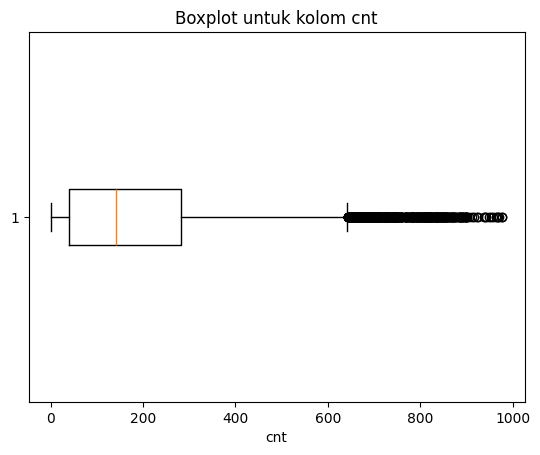

In [9]:
Q1 = hour_df[["cnt"]].quantile(0.25)
Q3 = hour_df[["cnt"]].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = hour_df[["cnt"]].apply(lambda x: x[(x < lower[0]) | (x > upper[0])])

print(f"Jumlah outlier pada kolom cnt : {outliers.shape[0]}")
print(outliers.head())

plt.boxplot(hour_df["cnt"], vert=False)
plt.title("Boxplot untuk kolom cnt")
plt.xlabel("cnt")
plt.show()

**Insight:**
- Dataset cukup baik karena tidak memiliki data yang kosong dan data yang duplikat
- Dataset memiliki banyak outlier dapat dilihat pada boxplot.

### Cleaning Data

In [10]:
print(f"Jumlah duplikasi : {hour_df.duplicated().sum()}")

Jumlah duplikasi : 0


In [11]:
print(f"Jumlah data kosong : {hour_df.isna().sum().sum()}")

Jumlah data kosong : 0


In [12]:
hour_df = hour_df.drop(outliers.index)
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


In [13]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
print("Banyak data season yang tidak sesuai " + str(hour_df[(hour_df["season"] != 1) & (hour_df["season"] != 2) & (hour_df["season"] != 3) & (hour_df["season"] != 4)].shape[0]))

Banyak data season yang tidak sesuai 0


In [15]:
print("Banyak data yr yang tidak sesuai " + str(hour_df[(hour_df["yr"] != 0) & (hour_df["yr"] != 1)].shape[0]))

Banyak data yr yang tidak sesuai 0


In [16]:
print("Banyak data hr yang tidak sesuai " + str(hour_df[(hour_df["hr"] < 0) | (hour_df["hr"] > 23)].shape[0]))

Banyak data hr yang tidak sesuai 0


In [17]:
print("Banyak data holiday yang tidak sesuai " + str(hour_df[(hour_df["holiday"] != 0) & (hour_df["holiday"] != 1)].shape[0]))

Banyak data holiday yang tidak sesuai 0


In [18]:
print("Banyak data weekday yang tidak sesuai " + str(hour_df[(hour_df["weekday"] < 0) | (hour_df["weekday"] > 6)].shape[0]))

Banyak data weekday yang tidak sesuai 0


In [19]:
print("Banyak data workingday yang tidak sesuai " + str(hour_df[(hour_df["workingday"] != 0) & (hour_df["workingday"] != 1)].shape[0]))

Banyak data workingday yang tidak sesuai 0


In [20]:
print("Banyak data weathersit yang tidak sesuai " + str(hour_df[(hour_df["weathersit"] != 1) & (hour_df["weathersit"] != 2) & (hour_df["weathersit"] != 3) & (hour_df["weathersit"] != 4)].shape[0]))

Banyak data weathersit yang tidak sesuai 0


**Insight:**
- Outlier sudah dibuang dari dataset.
- Setiap kolom sudah memiliki nilai yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15817,15818,2012-10-26,4,1,10,6,0,5,1,2,0.52,0.5000,0.88,0.0896,2,142,144
8250,8251,2011-12-15,4,0,12,10,0,4,1,2,0.40,0.4091,0.58,0.2985,4,105,109
14035,14036,2012-08-13,3,1,8,0,0,1,1,1,0.66,0.6212,0.65,0.1045,14,33,47
5750,5751,2011-09-02,3,0,9,1,0,5,1,3,0.62,0.5909,0.73,0.1045,4,28,32
9128,9129,2012-01-21,1,1,1,6,0,6,0,3,0.16,0.1667,0.93,0.1642,0,1,1


In [22]:
hour_df.groupby(by="season").agg({
    "cnt":"nunique"
}).sort_values(by="cnt", ascending=False)

,cnt
season,
2,620
3,613
4,590
1,464


In [23]:
hour_df.groupby(by="weathersit").agg({
    "cnt":"nunique"
}).sort_values(by="cnt", ascending=False)

,cnt
weathersit,
1,640
2,568
3,356
4,3


In [24]:
hour_df.groupby(by="weekday").agg({
    "cnt":"nunique"
}).sort_values(by="cnt", ascending=False)

,cnt
weekday,
6,564
0,545
3,535
1,531
5,527
4,523
2,522


In [25]:
hour_df.groupby(by="workingday").agg({
    "cnt":"nunique"
}).sort_values(by="cnt", ascending=False)

,cnt
workingday,
1,636
0,616


In [26]:
hour_df.groupby(by="holiday").agg({
    "cnt":"nunique"
}).sort_values(by="cnt", ascending=False)

,cnt
holiday,
0,640
1,274


In [27]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'] = hour_df['dteday'].dt.strftime('%Y-%m-%d')
hour_df['dteday']

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


Text(0.5, 0, 'Tanggal')

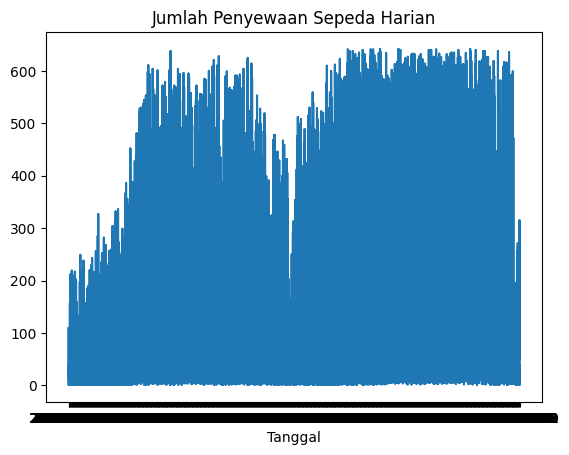

In [28]:
plt.plot(hour_df['dteday'], hour_df['cnt'])
plt.title('Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')

In [29]:
hour_df['dteday']

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2012-12-31
17377,2012-12-31


**Insight:**
- Berdasarkan season banyak penyewa sepeda terbanyak terjadi saat musim panas yaitu 620 orang, kemudian musim gugur yaitu 613 orang, kemudian musim dingin yaitu 590 orang, dan musim semi yaitu 464 orang.
- Berdasarkan weathersit banyak penyewa sepeda terbanyak terjadi saat kondisi cerah yaitu 640 orang, kemudian saat kondisi kabut yaitu 568 orang, kemudian saat hujan ringan yaitu 356 orang, dan saat hujan lebat 3 orang.
- Berdasarkan weekday dapat terlihat hari Sabtu paling banyak penyewa sepeda dan hari Selasa paling sedikit penyewa sepeda.
- Berdasarkan workingday dapat terlihat hari kerja lebih banyak penyewa sepeda dibanding bukan hari kerja.
- Berdasarkan holiday dapat terihat hari tidak libur lebih banyak penyewa sepeda dibanding hari libur.
- Kolom dteday dirubah menjada data datetime agar dapat diplot.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan jumlah penyewaan sepeda selama sekitar 2 tahun ?

<ipython-input-30-f6214795561e>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = hour_df.resample('M').agg({'cnt': 'sum'}).reset_index()


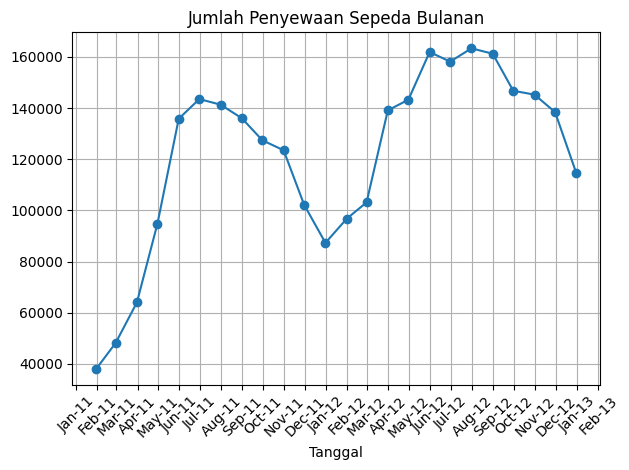

In [30]:
if 'dteday' not in hour_df.columns:
    hour_df.reset_index(inplace=True)

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.set_index('dteday', inplace=True)

monthly_data = hour_df.resample('M').agg({'cnt': 'sum'}).reset_index()

plt.plot(monthly_data['dteday'], monthly_data['cnt'],'-o')
plt.title('Jumlah Penyewaan Sepeda Bulanan')
plt.xlabel('Tanggal')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pengaruh season dan weathersit terhadap jumlah penyewaan sepeda ?

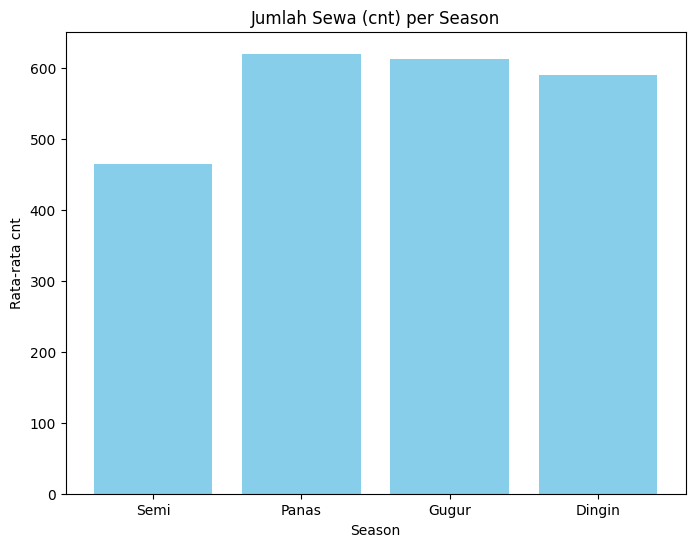

In [31]:
# Menghitung jumlah cnt per season
season_sum = hour_df.groupby('season')['cnt'].nunique().reset_index()
season_labels = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
season_sum['season_label'] = season_sum['season'].map(season_labels)

plt.figure(figsize=(8, 6))
plt.bar(season_sum['season_label'], season_sum['cnt'], color='skyblue')
plt.title("Jumlah Sewa (cnt) per Season")
plt.xlabel("Season")
plt.ylabel("Rata-rata cnt")
plt.show()


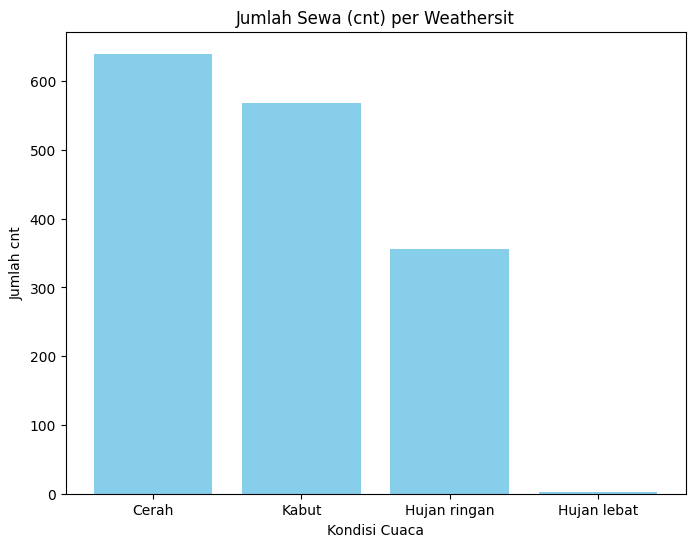

In [32]:
# Menghitung jumlah sewa unik per weathersit
weathersit_sum = hour_df.groupby('weathersit')['cnt'].nunique().reset_index()

weathersit_labels = {1: 'Cerah', 2: 'Kabut', 3: 'Hujan ringan', 4: 'Hujan lebat'}

weathersit_sum['weather_label'] = weathersit_sum['weathersit'].map(weathersit_labels)

plt.figure(figsize=(8, 6))
plt.bar(weathersit_sum['weather_label'], weathersit_sum['cnt'], color='skyblue')
plt.title("Jumlah Sewa (cnt) per Weathersit")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah cnt")
plt.show()


### Pertanyaan 3 Bagaimana pengaruh season, weathersit, holiday, workingday, dan weekday pada jumlah casual dan registered ?

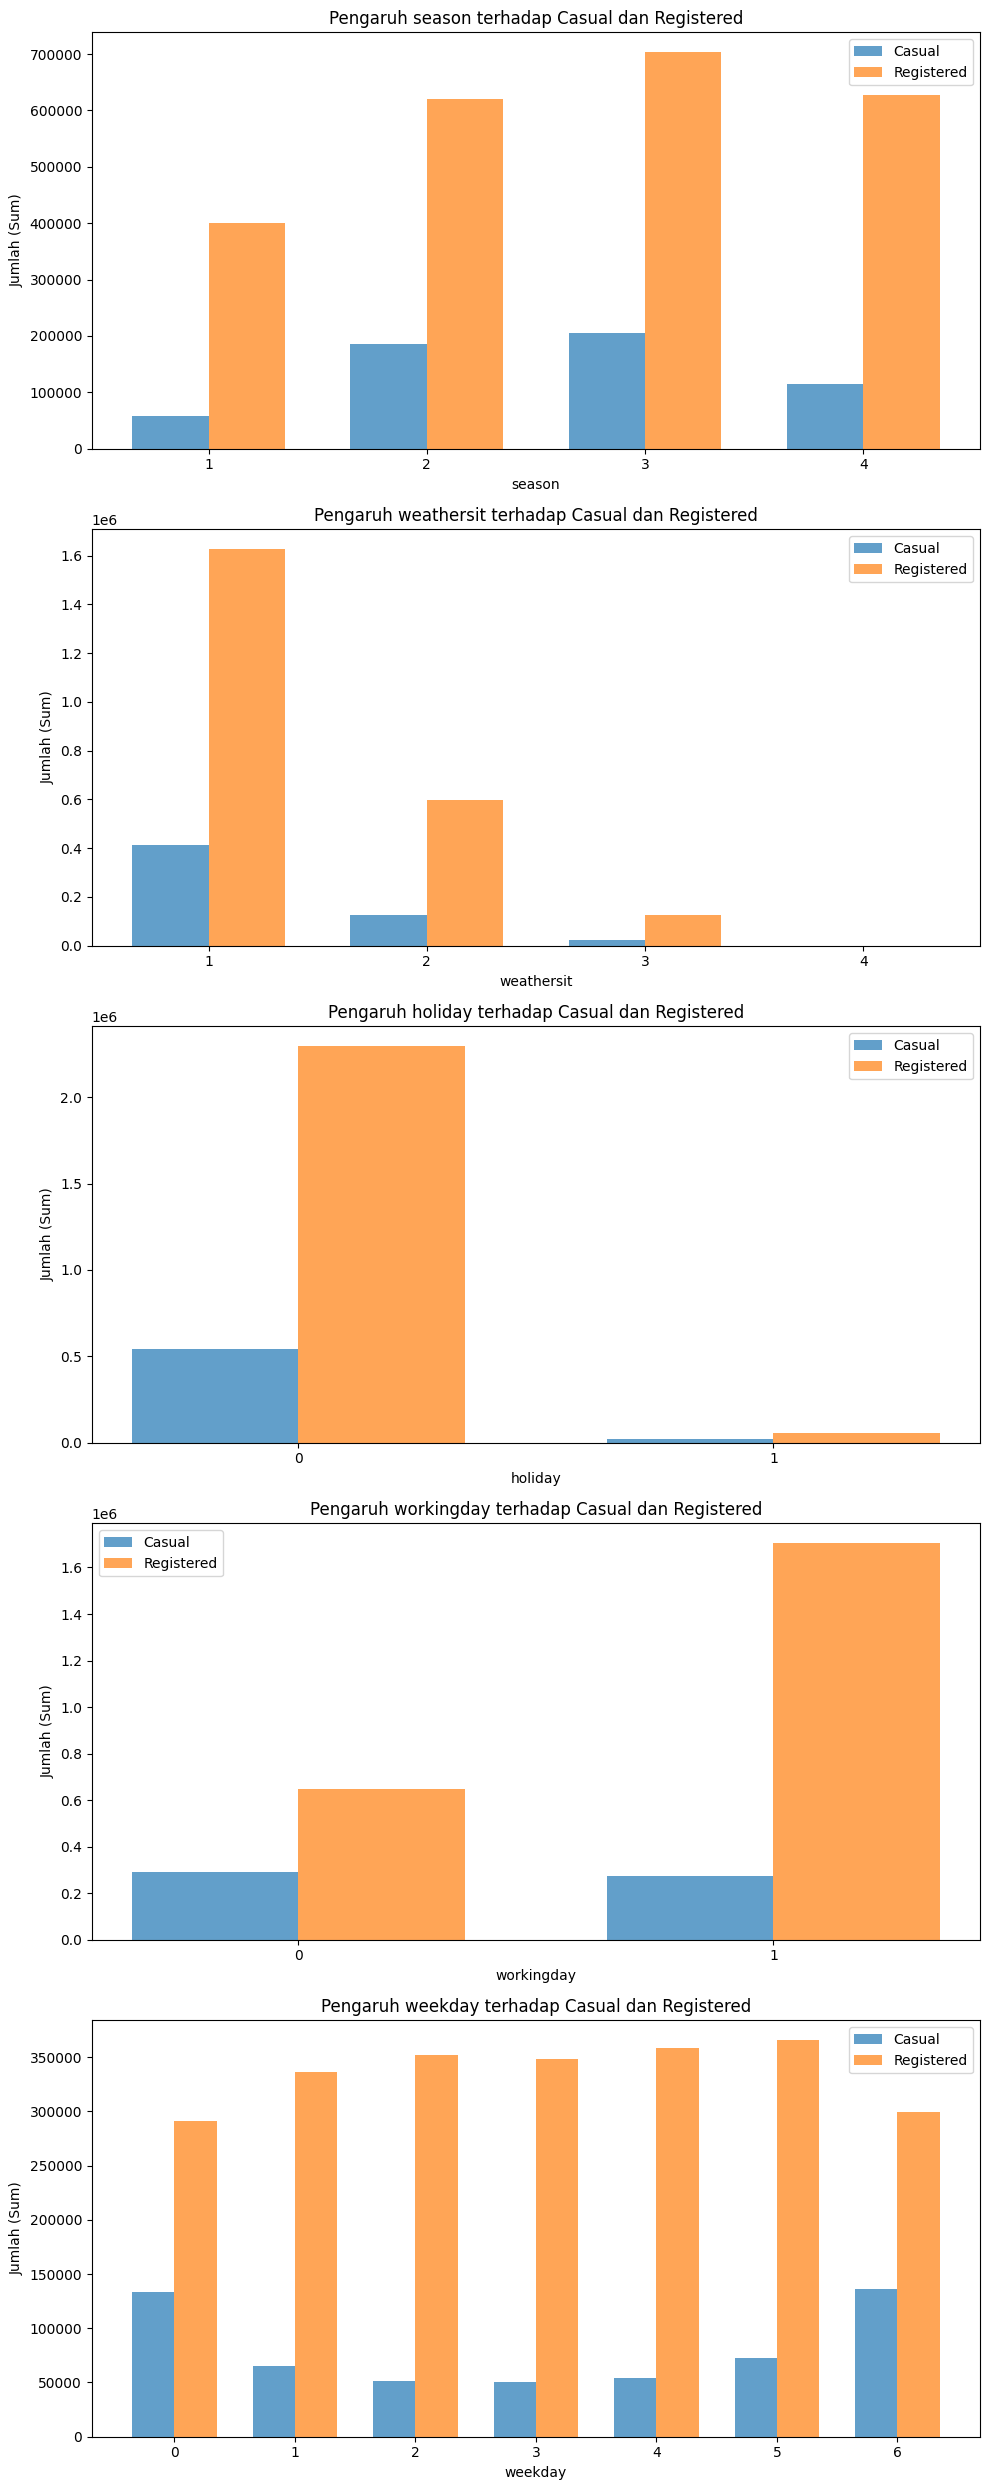

In [33]:
features = ['season', 'weathersit', 'holiday', 'workingday', 'weekday']

n_features = len(features)

fig, axs = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))

for i, feature in enumerate(features):
    aggregated = hour_df.groupby(feature)[['casual', 'registered']].sum().reset_index()

    ax = axs[i] if n_features > 1 else axs

    ind = np.arange(len(aggregated))
    width = 0.35

    ax.bar(ind - width/2, aggregated['casual'], width, label='Casual', alpha=0.7)
    ax.bar(ind + width/2, aggregated['registered'], width, label='Registered', alpha=0.7)

    ax.set_xticks(ind)
    ax.set_xticklabels(aggregated[feature].astype(str))
    ax.set_title(f"Pengaruh {feature} terhadap Casual dan Registered")
    ax.set_xlabel(feature)
    ax.set_ylabel("Jumlah (Sum)")
    ax.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan plot jumlah sewa sepeda bulanan, dalam rentang Januari-Juni mengalami tren positif sedangkan dalam rentang Juli-Desember mengalami tren negatif. Dari tahun 2011 ke 2012 mengalami kenaikan yang cukup signifikan. Januari menjadi bulan dimana penyewaan sepeda paling sedikit dan Juli menjadi bulan dimana penyewaan sepeda paling banyak. Hal tersebut menunjukkan adanya pola musiman dan tren sehingga data tidak stasioner.
- Berdasarkan plot jumlah sewa sepeda terbanyak terjadi di musim panas dan sewa sepeda tersedikit terjadi di musim semi. Hal tersebut mungkin terjadi karena saat panas orang cenderung malas untuk berjalan dan lebih ingin menggunakan sepeda, berbeda dengan saat semi cenderung sejuk sehingga orang cenderung ingin berjalan menikmati pepohonan yang lagi bersemi. Berdasarkan cuaca jumlah sewa sepeda terbanyak terjadi ketika cerah dan jumlah sewa sepeda tersedikit terjadi ketika hujan lebat. Hal tersebut sangat masuk akal karena saat hujan lebat tidak cocok menggunakan sepeda.
- Berdasarkan plot semua kondisi memberikan bahwa penyewa sepeda yang terdaftar selalu lebih banyak dibandingkan yang tidak terdaftar.


## Analisis Lanjutan (Opsional)

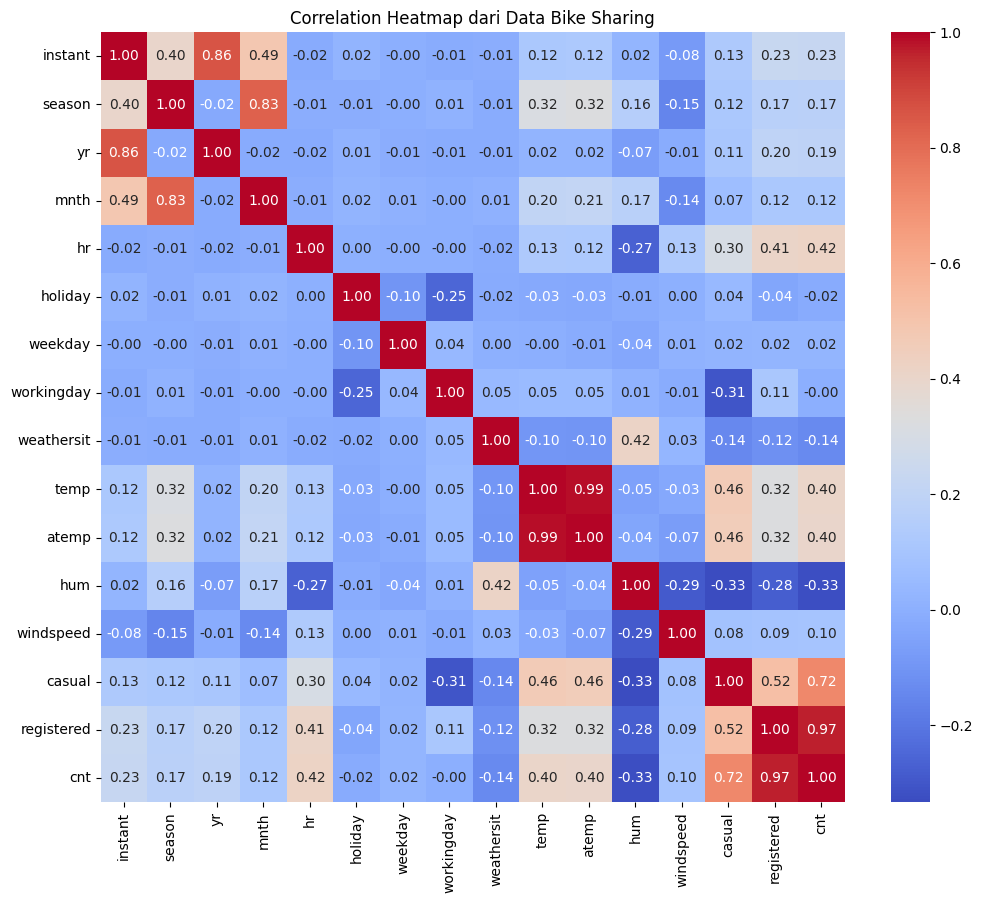

In [34]:
numeric_data = hour_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap dari Data Bike Sharing")
plt.show()


## Conclusion

- Perkembangan penyewaan sepeda dari tahun 2011 ke 2012 sangat baik terutama di bulan Januari-Juni meskipun pada bulan Juli-Desember mengalami penurunan.Berdasarkan plot jumlah sewa sepeda bulanan, dalam rentang Januari-Juni mengalami tren positif sedangkan dalam rentang Juli-Desember mengalami tren negatif. Dari tahun 2011 ke 2012 mengalami kenaikan yang cukup signifikan. Januari menjadi bulan dimana penyewaan sepeda paling sedikit dan Juli menjadi bulan dimana penyewaan sepeda paling banyak. Hal tersebut menunjukkan adanya pola musiman dan tren sehingga data tidak stasioner. Berdasarkan hasil EDA didapat bahwa jumlah penyewaan sepeda terendah pada tahun 2011 terjadi pada bulan Januari yaitu sebanyak kurang dari 40000, sedangkan jumlah penyewaan sepeda tertinggi terjadi pada bulan Juli sebanyak 140000. Selain itu, pada tahun 2012 jumlah penyewaan terendah terjadi pada bulan Januari sebanyak kurang dari 90000, sedangkan jumlah penyewaan sepeda tertinggi terjadi pada bulan Agustus sebanyak lebih dari 160000. Hal itu semakin menguatkan bahwa data penyewaan sepeda ini bersifat musiman. Sebaiknya penyewa sepeda mencoba mempertahankan angka penjualan seperti ini karena di setiap 1 tahun itu terus terjadi kenaikan, namun penyewa sepeda juga harus mencari strategi untuk meningkatkan penjualan khususnya di 6 Bulan terakhir (Agustus-Desember) yang selalu memiliki tren negatif, mungkin salah satu saran nya ialah meningkatkan promosi atau promo di bulan-bulan tersebut.
- Pengaruh season dan weathersit cukup berpengaruh pada penyewaan sepeda, penyewaan sepeda terbanyak terjadi di Musim Panas dan Cuaca Cerah, sedangkan penyewaan sepeda tersedikit terjadi di Musim Semi dan Cuaca Hujan Lebat.Berdasarkan plot jumlah sewa sepeda terbanyak terjadi di musim panas dan sewa sepeda tersedikit terjadi di musim semi. Hal tersebut mungkin terjadi karena saat panas orang cenderung malas untuk berjalan dan lebih ingin menggunakan sepeda, berbeda dengan saat semi cenderung sejuk sehingga orang cenderung ingin berjalan menikmati pepohonan yang lagi bersemi. Berdasarkan cuaca jumlah sewa sepeda terbanyak terjadi ketika cerah dan jumlah sewa sepeda tersedikit terjadi ketika hujan lebat. Hal tersebut sangat masuk akal karena saat hujan lebat tidak cocok menggunakan sepeda. Berdasarkan hasil EDA, didapat bahwa penyewaan sepeda pada musim panas mencapai angka 600 sepeda yang merupakan tertinggi dari 4 musim, sedangkan musim semi hanya sekitar 450 sepeda. Selain itu, berdasarkan cuaca didapat tertinggi sebanyak 450 sepeda saat cuaca cerah dan hanya 3 ketika cuaca hujan lebat. Hal tersebut menguatkan bahwa penyewaan sepeda sangat bergantung pada musim dan cuaca. Hal tersebut sulit dikontrol oleh penyewa sepeda karena itu merupakan faktor eksternal, namun bisa saja jika penyewa dapat kreatif memberikan promosi di musim semi dan menyediakan inovasi untuk penyewaan sepeda saat hujan lebat.
- Pengaruh semua fitur cukup konsisten menunjukkan penyewa sepeda yang merupakan pendaftar selalu lebih banyak dibanding yang bukan pendaftar.Berdasarkan plot semua kondisi memberikan bahwa penyewa sepeda yang terdaftar selalu lebih banyak dibandingkan yang tidak terdaftar. Berdasarkan hasil EDA, didapat gap antara penyewa sepeda yang terdaftar dan tidak terdaftar sangat jauh perbedaannya yaitu sekitar 160000-800000. Hal ini mendukung bahwa pendaftar lebih banyak menyewa dibanding yang tidak mendaftar. Hal tersebut merupakan tanda yang baik bagi penyewa sepeda karena mostly customernya sudah mendaftar untuk menjadi langganan menyewa sepeda. Namun, masih ada hal yang dapat diimprove yaitu mengurangi secara signifikan customer yang belum mendaftar dengan menawarkan suatu tawaran menarik bila mereka mendaftar terlebih dahulu.